# Análisis del problema
El dataset de Telco Customer Churn contiene información sobre los clientes de una compañía de telecomunicaciones, incluyendo detalles sobre sus
características demográficas, los servicios que utilizan, el tipo de contrato que tienen, sus métodos de pago, y otros aspectos relacionados con su
comportamiento como clientes. El objetivo principal del análisis es predecir si un cliente se dará de baja o "churn" (abandono) de la compañía,
lo cual está representado por la variable objetivo Churn (donde "1" indica que el cliente ha abandonado y "0" que no lo ha hecho).
Utilizando estos datos, el problema busca identificar patrones y factores clave que puedan influir en la decisión de los clientes de continuar o
abandonar, lo que es esencial para que la compañía pueda implementar estrategias proactivas de retención de clientes.


`gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn`: son variables categóricas codificadas
como enteros (integers).

`tenure`: duración de la suscripción del cliente (en meses), también un valor entero (integers).

`MonthlyCharges y TotalCharges`: son variables numéricas continuas que indican los cargos mensuales y totales del cliente (float64).

# Exploracion de datos

## Librerias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Load dataset
file_path = '../datasets/Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

data = data.drop('customerID', axis=1)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna(data.median(numeric_only=True), inplace=True)

# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


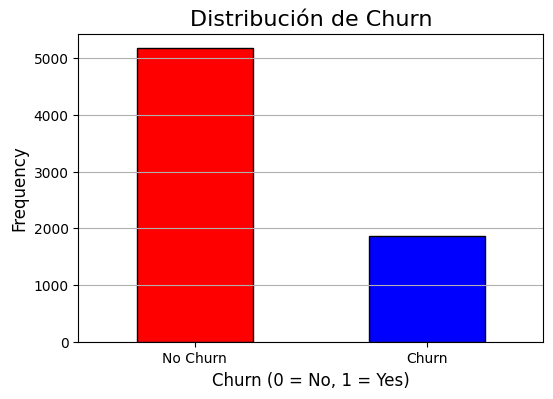

In [3]:
# Crear un diagrama de distribución para la variable Churn
plt.figure(figsize=(6, 4))
data['Churn'].value_counts().plot(kind='bar', color=['red', 'blue'], edgecolor='black')
plt.title('Distribución de Churn', fontsize=16)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.grid(True, axis='y')
plt.show()

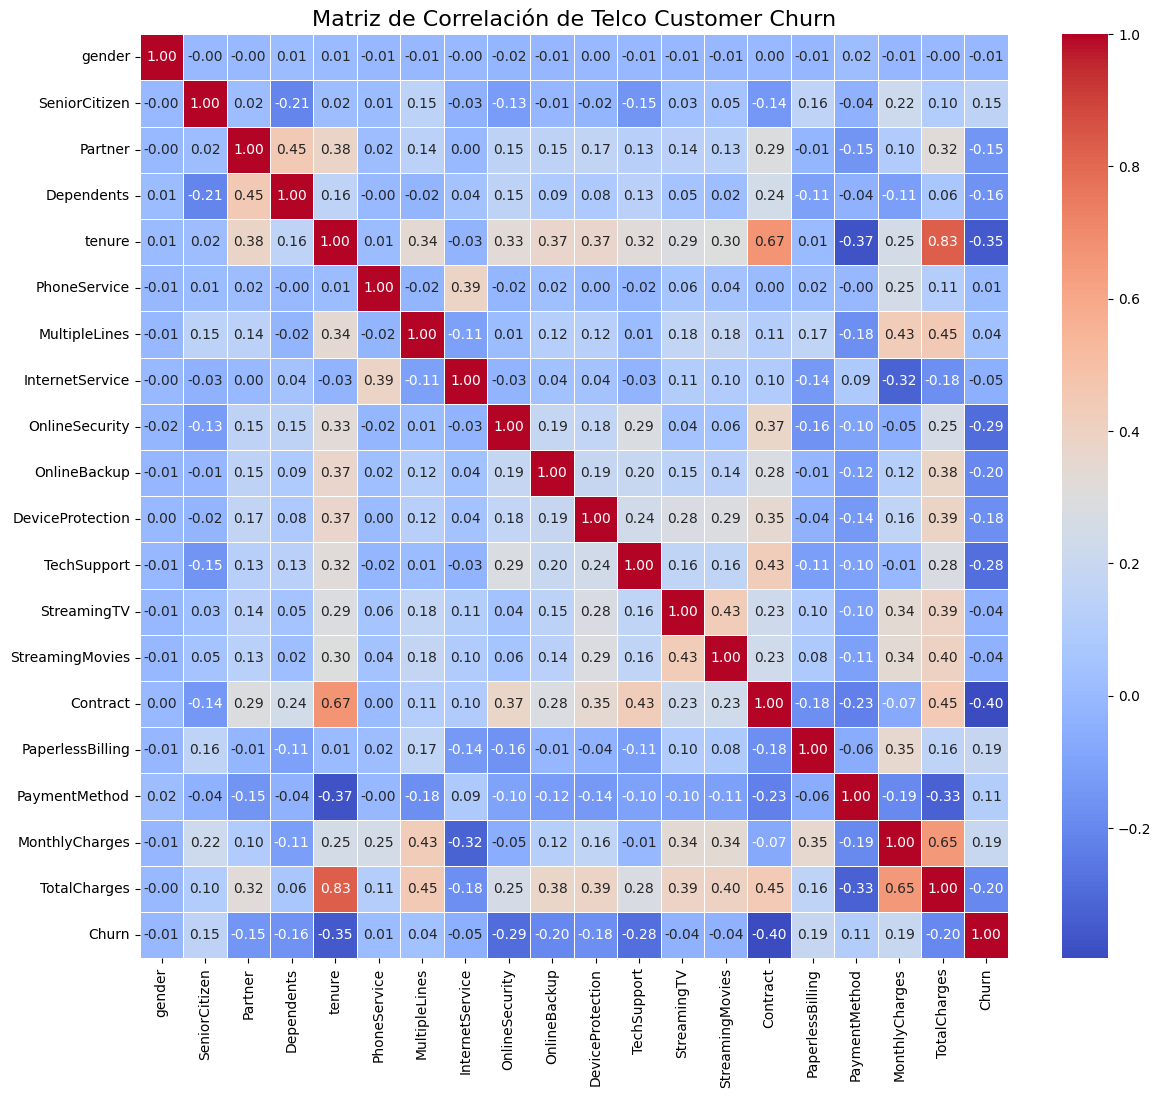

In [4]:
# Matriz de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(14, 12))
plt.title('Matriz de Correlación de Telco Customer Churn', fontsize=16)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [5]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo Machine Learning

In [7]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

print(X_test.shape)
y_pred_log_reg = log_reg.predict(X_test)



accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
# Mostrar resultados
print("Accuracy:", accuracy_log_reg)
print("Reporte de clasificación:\n", classification_rep_log_reg)

(2113, 19)
Accuracy: 0.7543776620918126
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1539
           1       0.53      0.83      0.65       574

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.77      2113



# Evaluaciones

AUC: 0.78


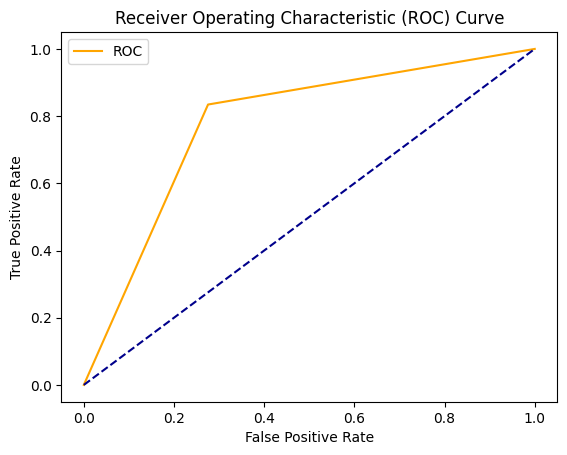

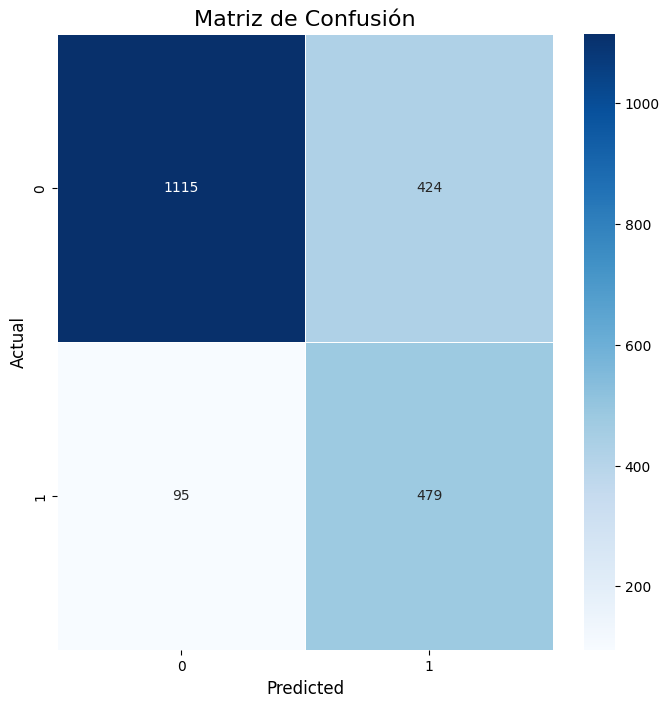

In [8]:

auc = roc_auc_score(y_test, y_pred_log_reg)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


# Resultados
Los resultados del modelo de predicción de bajas de clientes muestran un **accuracy** del 75.4%, lo que indica que el modelo clasifica correctamente aproximadamente tres cuartas partes de los casos. En cuanto al análisis por clases, el modelo predice mejor a los clientes que no se dan de baja (clase 0), con una **precision** del 92% y un **recall** del 72%, lo que significa que aunque la mayoría de las predicciones de permanencia son correctas, no detecta todos los clientes que realmente se quedan. Por otro lado, para los clientes que se dan de baja (clase 1), el modelo tiene una **precision** del 53% y un **recall** del 83%, lo que indica que logra identificar la mayoría de los clientes que se dan de baja, pero con un mayor número de falsos positivos. Esto sugiere que el modelo es más confiable en la detección de clientes que se van, pero tiene margen de mejora para reducir los falsos positivos y aumentar la precisión general.